In [8]:
using Bloqade
using PythonCall
# using PyCall
plt = pyimport("matplotlib.pyplot");

# Create Z2 state on a 1D 9-atom chain 
I will create a 9-atom chain with all the atoms at ground state. Then let it envolve under certain Rabi pulse with a changing detuning to the Z2 state |grgrgrgrg>

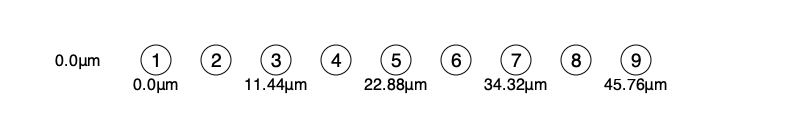

In [9]:
nsites = 9;
atoms = generate_sites(ChainLattice(),nsites,scale = 5.72)

Simulate rabi oscilation of 9-atom array

In [10]:
total_time = 3.0;
Ω_max = 2π * 4;
Ω = piecewise_linear(clocks = [0.0, 0.1, 2.1, 2.2, total_time], values = [0.0, Ω_max, Ω_max, 0, 0]);
U1 = -2π * 10;
U2 = 2π * 10;
Δ = piecewise_linear(clocks = [0.0, 0.6, 2.1, total_time], values = [U1, U1, U2, U2]);
h = rydberg_h(atoms; Δ, Ω)#detuning, Rabi frequency (unit MHz), phase
reg = zero_state(9)# define initial state
prob = SchrodingerProblem(reg, total_time, h)#, save_everystep = true)
emulate!(prob)

SchrodingerProblem:
  register info:
    type: ArrayReg{2, ComplexF64, Matrix{ComplexF64}}
    storage size: 8 bytes

  time span (μs): (0.0, 3.0)

  equation: 
    storage size: 76.023 KiB
    expression:
nqubits: 9
+
├─ [+] ∑ 2π ⋅ 8.627e6.0/|r_i-r_j|^6 n_i n_j
├─ [+] Ω(t) ⋅ ∑ σ^x_i
└─ [-] Δ(t) ⋅ ∑ n_i


  options:
    save_everystep: false
    save_start: false
    save_on: false
    dense: false


In [11]:
integrator = init(prob, Vern8());
densities = []
for _ in TimeChoiceIterator(integrator, 0.0:1e-3:total_time)
    push!(densities, rydberg_density(reg))
end
D = hcat(densities...);

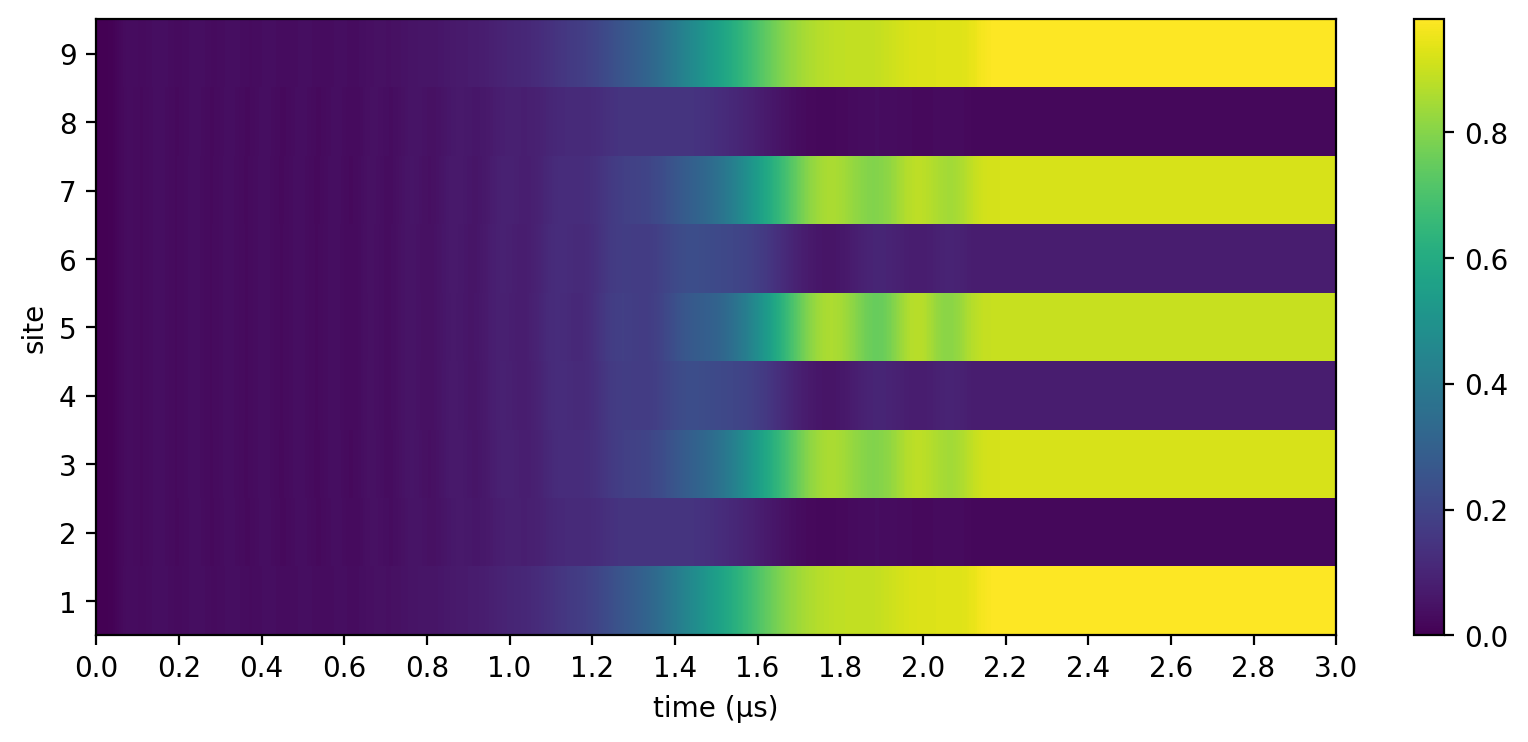

In [12]:
fig, ax = plt.subplots(figsize = (10, 4))
shw = ax.imshow(real(D), interpolation = "nearest", aspect = "auto", extent = [0, total_time, 0.5, nsites + 0.5])
ax.set_xlabel("time (μs)")
ax.set_ylabel("site")
ax.set_xticks(0:0.2:total_time)
ax.set_yticks(1:nsites)
bar = fig.colorbar(shw)
fig

To confirm the formation of Z2 state, we also plotted bistring distribution

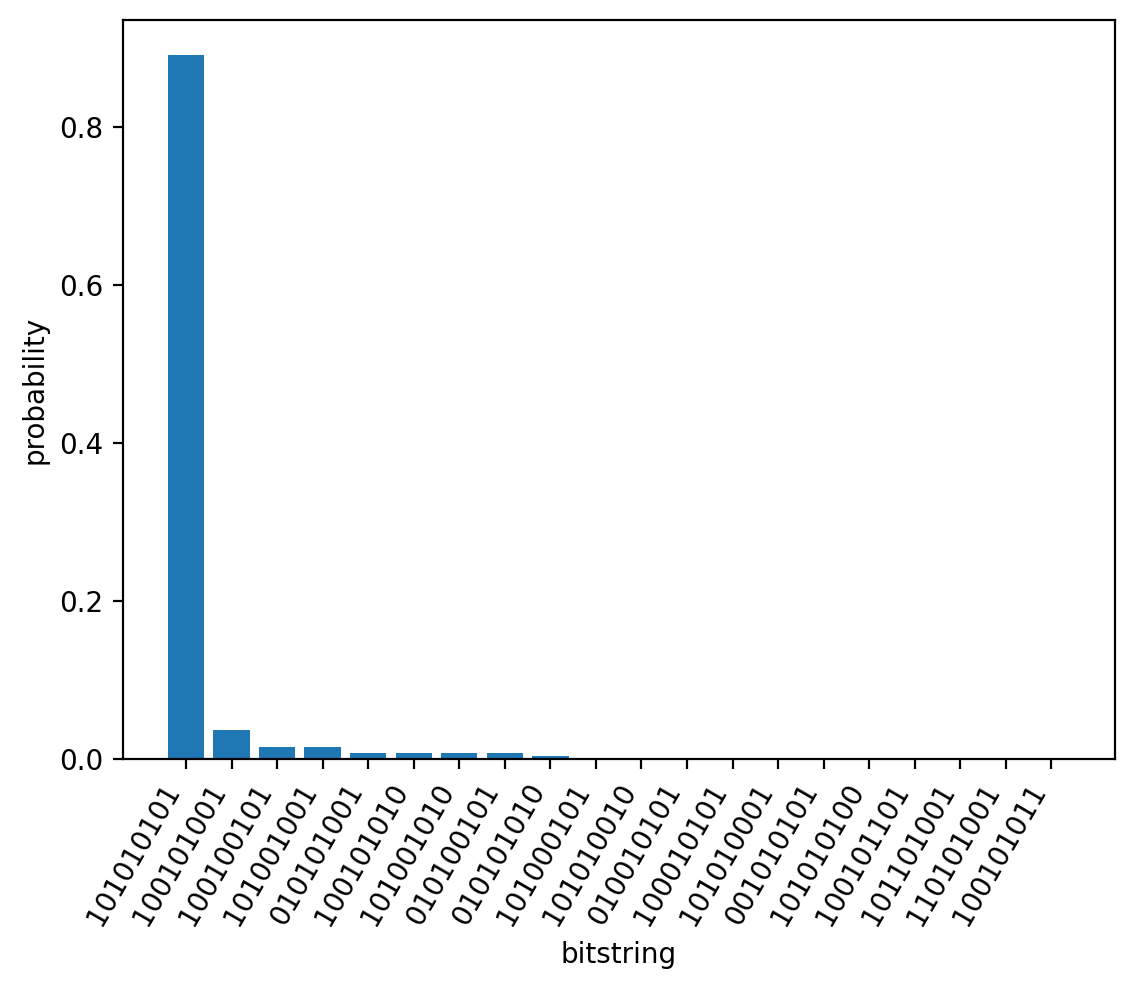

In [13]:
bitstring_hist(reg; nlargest = 20)

## Calculate expectation value of $\sigma^x_i$ 
we can calculate the expectation value of $\sigma^x_i$ of each site. I will also plot out $\sigma^z_i$ as comparasion

In [17]:
sigma_x = [];
sigma_z = [];
for i = 1:9
    append!(sigma_x, expect(put(9,i=>X),reg))
    append!(sigma_z, expect(put(9,i=>Z),reg))
end

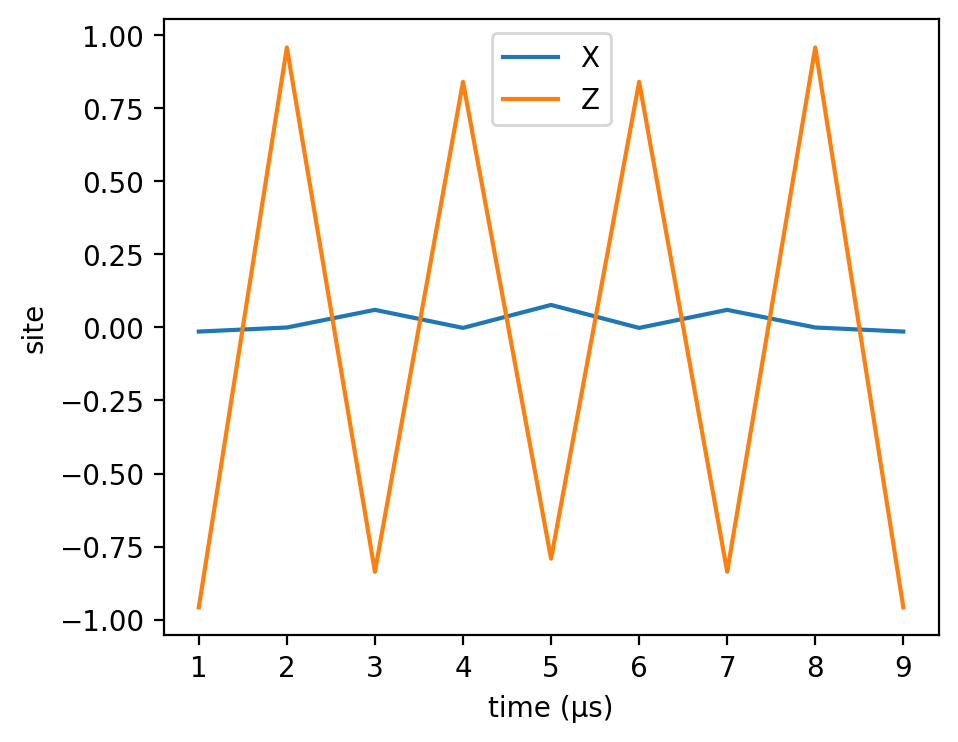

In [19]:
fig, ax = plt.subplots(figsize = (5, 4))
shw_1 = ax.plot((1:9),real(sigma_x),label = 'X')
shw_2 = ax.plot((1:9),real(sigma_z),label = 'Z')
ax.set_xlabel("site")
ax.set_ylabel("")
ax.legend()
fig

Theoretically, if we have an ideal Z2 state, $<\sigma_i^x>$ should be zero on each site, and $<\sigma_i^z>$ will oscilate between 1 and -1 site-to-site. Given the state we prepared is not ideal, we saw $<\sigma_i^x>$ fluctuaing around zero and $<\sigma_i^z>$ oscillating between 1 and -1 that matches our expectation of a Z2 state

## calculate energy difference between ground state and Z2 state
Energy is evaluated by the expectation value of a static Halmitonian h_stat on certain state we are interested in
Note: In the question description we are asked to calculate the energy difference between ground state and the first excited state. The first excuted state could be a complicated superposition determined by given parameters in Hamiltonian. We didn't find a way to calculate eigenstates in Bloqade. Instead, we calculated the energy difference between ground state(|ggg...>) and the Z2 state in odd number-of-atom cases and campare.

In [30]:
E_g = [];
E_z2 = [];
N_site = [];

### $n_{site} = 3$

In [31]:
atoms = generate_sites(ChainLattice(),3,scale = 5.72)
reg = zero_state(3)# define initial state
h = rydberg_h(atoms; Δ, Ω)#detuning, Rabi frequency (unit MHz), phase
h_stat = rydberg_h(atoms; Δ = 0, Ω = 0)
append!(E_g, expect(h_stat,reg))
prob = SchrodingerProblem(reg, total_time, h)
emulate!(prob)
append!(E_z2, expect(h_stat,reg))
append!(N_site, 3);

### $n_{site} = 5$

In [32]:
atoms = generate_sites(ChainLattice(),5,scale = 5.72)
reg = zero_state(5)# define initial state
h = rydberg_h(atoms; Δ, Ω)#detuning, Rabi frequency (unit MHz), phase
h_stat = rydberg_h(atoms; Δ = 0, Ω = 0)
append!(E_g, expect(h_stat,reg))
prob = SchrodingerProblem(reg, total_time, h)
emulate!(prob)
append!(E_z2, expect(h_stat,reg))
append!(N_site, 5);

### $n_{site} = 7$

In [33]:
atoms = generate_sites(ChainLattice(),7,scale = 5.72)
reg = zero_state(7)# define initial state
h = rydberg_h(atoms; Δ, Ω)#detuning, Rabi frequency (unit MHz), phase
h_stat = rydberg_h(atoms; Δ = 0, Ω = 0)
append!(E_g, expect(h_stat,reg))
prob = SchrodingerProblem(reg, total_time, h)
emulate!(prob)
append!(E_z2, expect(h_stat,reg))
append!(N_site, 7);

### $n_{site} = 9$

In [34]:
atoms = generate_sites(ChainLattice(),9,scale = 5.72)
reg = zero_state(9)# define initial state
h = rydberg_h(atoms; Δ, Ω)#detuning, Rabi frequency (unit MHz), phase
h_stat = rydberg_h(atoms; Δ = 0, Ω = 0)
append!(E_g, expect(h_stat,reg))
prob = SchrodingerProblem(reg, total_time, h)
emulate!(prob)
append!(E_z2, expect(h_stat,reg))
append!(N_site, 9);

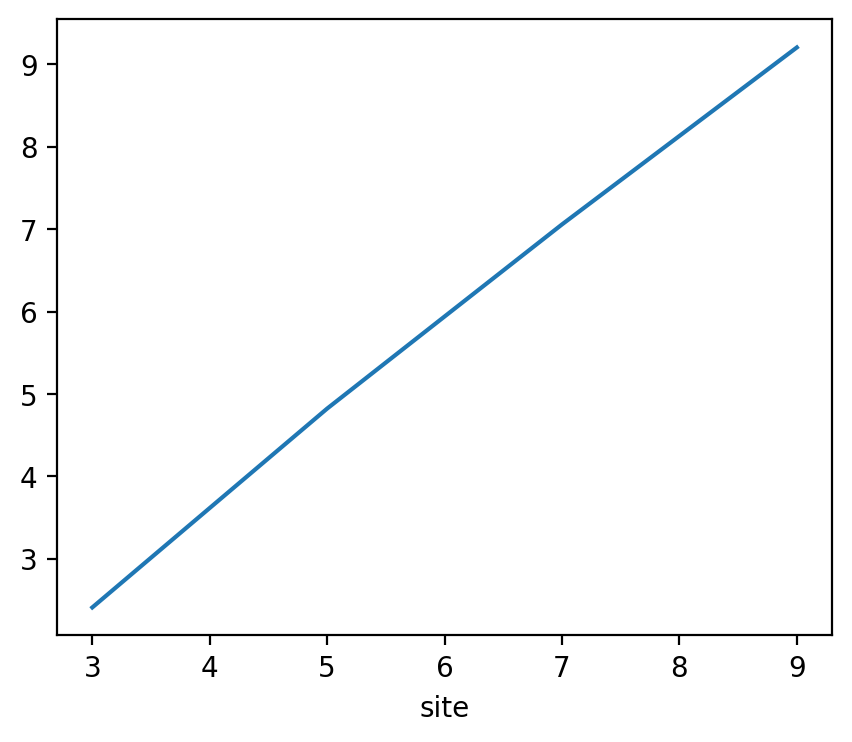

In [35]:
fig, ax = plt.subplots(figsize = (5, 4))
shw_1 = ax.plot(N_site,real(E_z2-E_g))
ax.set_xlabel("number of sites")
ax.set_ylabel("Energy difference")
fig

Plot energy difference per atom

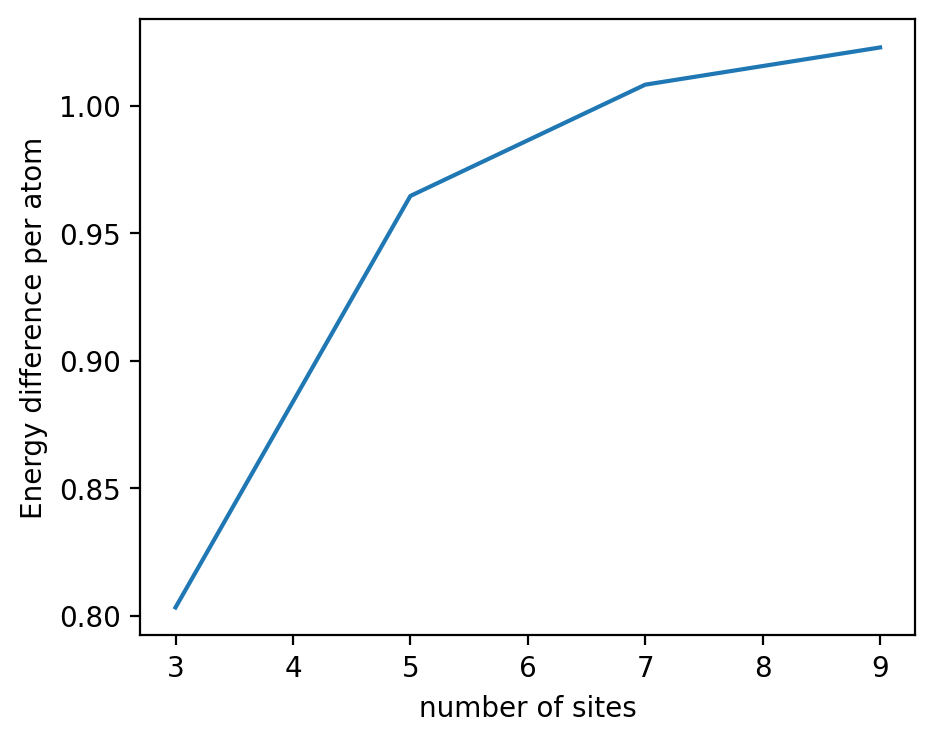

In [36]:
fig, ax = plt.subplots(figsize = (5, 4))
shw_1 = ax.plot(N_site,real((E_z2-E_g)./N_site))
ax.set_xlabel("number of sites")
ax.set_ylabel("Energy difference per atom")
fig

This result indicates: adiabaic ptorocal will be more viable if we have more sites. But it will saturate with more atoms since the imperfection is given by edge effect.